In [1]:
import pandas as pd
import numpy as np
import torch
from sklearn.model_selection import train_test_split
import torch.nn.functional as F

# References:
# https://medium.com/analytics-vidhya/implement-linear-regression-on-boston-housing-dataset-by-pytorch-c5d29546f938
# https://www.datacamp.com/community/tutorials/pandas-read-csv
# https://www.geeksforgeeks.org/linear-regression-using-pytorch/
# https://www.learnpython.org/en/Pandas_Basics
# https://www.geeksforgeeks.org/how-to-get-column-names-in-pandas-dataframe/
# https://towardsdatascience.com/linear-classification-in-pytorch-9d8a8f8ff264
# https://github.com/pytorch/examples/blob/master/mnist/main.py

In [2]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [3]:
orig_data = pd.read_csv('data.csv')

# uncomment line below to reduce size
# orig_data = orig_data.head(10000)

In [4]:
orig_data

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,...,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,FIRST_DEP_TIME,TOTAL_ADD_GTIME,LONGEST_ADD_GTIME,Unnamed: 64
0,2019,3,7,18,4,2019-07-18,NK,20416,NK,N602NK,...,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,3,7,19,5,2019-07-19,NK,20416,NK,N696NK,...,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,3,7,20,6,2019-07-20,NK,20416,NK,N604NK,...,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,3,7,21,7,2019-07-21,NK,20416,NK,N632NK,...,8,21.0,0.0,17.0,0.0,0.0,NaN,NaN,NaN,NaN
4,2019,3,7,22,1,2019-07-22,NK,20416,NK,N649NK,...,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659024,2019,3,7,22,1,2019-07-22,AA,19805,AA,N870NN,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
659025,2019,3,7,23,2,2019-07-23,AA,19805,AA,N967NN,...,1,0.0,7.0,36.0,0.0,0.0,NaN,NaN,NaN,NaN
659026,2019,3,7,24,3,2019-07-24,AA,19805,AA,N954AN,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
659027,2019,3,7,25,4,2019-07-25,AA,19805,AA,N918NN,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print(orig_data.columns)

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'OP_UNIQUE_CARRIER', 'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'TAIL_NUM',
       'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID',
       'ORIGIN_CITY_MARKET_ID', 'ORIGIN', 'ORIGIN_CITY_NAME',
       'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS', 'ORIGIN_STATE_NM',
       'ORIGIN_WAC', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID',
       'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR',
       'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_WAC', 'CRS_DEP_TIME',
       'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15',
       'DEP_DELAY_GROUP', 'DEP_TIME_BLK', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_DELAY_GROUP', 'ARR_TIME_BLK',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'FLIGHTS', 'DISTANCE',
       'DISTANCE_GROU

In [6]:
data = orig_data[['DAY_OF_WEEK', 'OP_CARRIER', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'CRS_ELAPSED_TIME', 'ARR_DELAY_NEW']]

In [7]:
data

,DAY_OF_WEEK,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,CRS_ELAPSED_TIME,ARR_DELAY_NEW
0,4,NK,SEA,IAH,55,249.0,0.0
1,5,NK,SEA,IAH,55,249.0,4.0
2,6,NK,SEA,IAH,55,249.0,NaN
3,7,NK,SEA,IAH,55,249.0,38.0
4,1,NK,SEA,IAH,55,249.0,0.0
...,...,...,...,...,...,...,...
659024,1,AA,CLT,ATL,1500,80.0,0.0
659025,2,AA,CLT,ATL,1500,80.0,43.0
659026,3,AA,CLT,ATL,1500,80.0,0.0
659027,4,AA,CLT,ATL,1500,80.0,0.0


In [8]:
carrier_codes_to_number_dict = dict()
count = 0
carrier_codes = sorted(list(set(data['OP_CARRIER'])))
for code in carrier_codes:
    carrier_codes_to_number_dict[code] = count
    count += 1
for i, row in data.iterrows(): 
    data.at[i, 'OP_CARRIER'] = carrier_codes_to_number_dict[data.at[i, 'OP_CARRIER']]

In [9]:
origin_to_number_dict = dict()
count = 0
origins = sorted(list(set(data['ORIGIN'])))
for origin in origins:
    origin_to_number_dict[origin] = count
    count += 1
for i, row in data.iterrows(): 
    data.at[i, 'ORIGIN'] = origin_to_number_dict[data.at[i, 'ORIGIN']]

In [10]:
dest_to_number_dict = dict()
count = 0
dests = sorted(list(set(data['DEST'])))
for dest in dests:
    dest_to_number_dict[dest] = count
    count += 1
for i, row in data.iterrows(): 
    data.at[i, 'DEST'] = dest_to_number_dict[data.at[i, 'DEST']]

In [11]:
data = data.dropna()

In [12]:
for i, row in data.iterrows():
    data.at[i, 'ARR_DELAY_NEW'] = 1 if data.at[i, 'ARR_DELAY_NEW'] > 0 else 0

In [13]:
# normalize features

output = data[data.columns[-1]]

df = data[data.columns[:-1]]
df = df.apply(
    lambda x: (x - x.mean()) / x.std()
)

df = df.dropna()

In [14]:
df

,DAY_OF_WEEK,OP_CARRIER,ORIGIN,DEST,CRS_DEP_TIME,CRS_ELAPSED_TIME
0,0.117217,0.280802,1.36687,-0.105976,-2.556638,1.460054
1,0.613572,0.280802,1.36687,-0.105976,-2.556638,1.460054
3,1.606280,0.280802,1.36687,-0.105976,-2.556638,1.460054
4,-1.371846,0.280802,1.36687,-0.105976,-2.556638,1.460054
5,-0.875491,0.280802,1.36687,-0.105976,-2.556638,1.460054
...,...,...,...,...,...,...
659024,-1.371846,-1.42503,-1.04866,-1.58779,0.335653,-0.848914
659025,-0.875491,-1.42503,-1.04866,-1.58779,0.335653,-0.848914
659026,-0.379137,-1.42503,-1.04866,-1.58779,0.335653,-0.848914
659027,0.117217,-1.42503,-1.04866,-1.58779,0.335653,-0.848914


In [15]:
output

0         0.0
1         1.0
3         1.0
4         0.0
5         1.0
         ... 
659024    0.0
659025    1.0
659026    0.0
659027    0.0
659028    0.0
Name: ARR_DELAY_NEW, Length: 643781, dtype: float64

In [16]:
np_data = df.to_numpy().astype(np.float)
X = np_data[:,0:6]
Y = output.to_numpy().astype(np.float)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10)

In [17]:
np_data

array([[ 0.11721724,  0.28080203,  1.36687075, -0.10597581, -2.55663791,
         1.46005402],
       [ 0.61357151,  0.28080203,  1.36687075, -0.10597581, -2.55663791,
         1.46005402],
       [ 1.60628007,  0.28080203,  1.36687075, -0.10597581, -2.55663791,
         1.46005402],
       ...,
       [-0.37913704, -1.4250285 , -1.0486646 , -1.58779253,  0.33565324,
        -0.84891405],
       [ 0.11721724, -1.4250285 , -1.0486646 , -1.58779253,  0.33565324,
        -0.84891405],
       [ 0.61357151, -1.4250285 , -1.0486646 , -1.58779253,  0.33565324,
        -0.84891405]])

In [18]:
X_train = torch.tensor(X_train, dtype=torch.float).to(device)
X_test = torch.tensor(X_test, dtype=torch.float).to(device)
Y_train = torch.tensor(Y_train, dtype=torch.float).view(-1, 1).to(device)
Y_test = torch.tensor(Y_test, dtype=torch.float).view(-1, 1).to(device)

In [19]:
print(data)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

        DAY_OF_WEEK OP_CARRIER ORIGIN DEST  CRS_DEP_TIME  CRS_ELAPSED_TIME  \
0                 4         10    305  163            55             249.0   
1                 5         10    305  163            55             249.0   
3                 7         10    305  163            55             249.0   
4                 1         10    305  163            55             249.0   
5                 2         10    305  163            55             249.0   
...             ...        ...    ...  ...           ...               ...   
659024            1          1     72   20          1500              80.0   
659025            2          1     72   20          1500              80.0   
659026            3          1     72   20          1500              80.0   
659027            4          1     72   20          1500              80.0   
659028            5          1     72   20          1500              80.0   

        ARR_DELAY_NEW  
0                 0.0  
1              

In [20]:
n_examples = X_train.shape[0]
n_cols = X_train.shape[1]

In [21]:
model = torch.nn.Sequential(
    torch.nn.Linear(n_cols, 1)
).to(device)
torch.nn.init.normal_(model[0].weight, mean=0, std=0.5)
torch.nn.init.constant_(model[0].bias, val=0)

train_data = torch.utils.data.TensorDataset(X_train, Y_train)

train_iterator = torch.utils.data.DataLoader(train_data, batch_size=256, shuffle=True)

optimizer = torch.optim.SGD(model.parameters(), lr=1e-4, momentum=0.9)

# loss = torch.nn.MSELoss()
loss = torch.nn.BCEWithLogitsLoss()

num_epochs = 20
losses = []
for epoch in range(num_epochs):
    for x, y in train_iterator:
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad()
        output = model(x)
        l = loss(output, y)
        l.backward()
        optimizer.step()
    print("epoch {} loss: {:.4f}".format(epoch + 1, l.item()))
    losses.append(l.item())

epoch 1 loss: 0.8942
epoch 2 loss: 0.6212
epoch 3 loss: 0.6598
epoch 4 loss: 0.6691
epoch 5 loss: 0.6574
epoch 6 loss: 0.6118
epoch 7 loss: 0.7058
epoch 8 loss: 0.6334
epoch 9 loss: 0.5654
epoch 10 loss: 0.6106
epoch 11 loss: 0.5859
epoch 12 loss: 0.6854
epoch 13 loss: 0.6318
epoch 14 loss: 0.6634
epoch 15 loss: 0.6480
epoch 16 loss: 0.6411
epoch 17 loss: 0.6533
epoch 18 loss: 0.6672
epoch 19 loss: 0.5816
epoch 20 loss: 0.6727


In [22]:
print(loss(model(X_test), Y_test).item())

0.6302733421325684


In [23]:
print(model(X_test[0]).data)
print(Y_test[0])

tensor([-1.0144], device='cuda:0')
tensor([0.], device='cuda:0')


In [24]:
with torch.no_grad():
  p_train = model(X_train)
  p_train = (p_train.cpu().numpy() > 0)

  train_acc = np.mean(Y_train.cpu().numpy() == p_train)

  p_test = model(X_test)
  p_test = (p_test.cpu().numpy() > 0)
  
  test_acc = np.mean(Y_test.cpu().numpy() == p_test)

print(train_acc)
print(test_acc)

0.636397527105533
0.6378788114136598


In [25]:
import matplotlib.pyplot as plt

In [29]:
epochs = [*range(1,21,)]

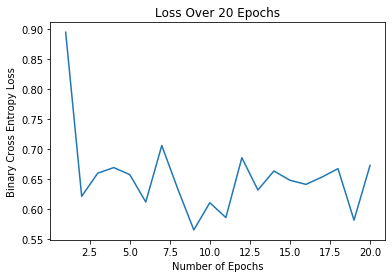

In [31]:
plt.plot(epochs, losses)
plt.title('Loss Over 20 Epochs')
plt.xlabel('Number of Epochs')
plt.ylabel('Binary Cross Entropy Loss')
plt.show()